
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [ ]:
#Eliminamos outliers en la cola derecha de la distribucion del grupo A#
groupA=groupA[groupA < groupA.quantile(0.97)]


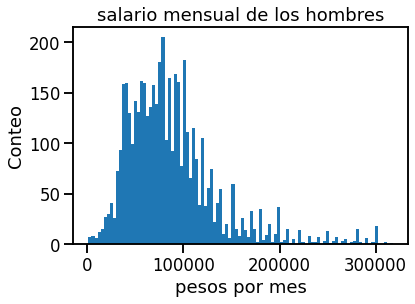

In [ ]:
import matplotlib.pyplot as plt
plt.hist(groupA, bins=100)
plt.title('salario mensual de los hombres')
plt.xlabel('pesos por mes')
plt.ylabel('Conteo')
plt.show()


 


In [ ]:
#Eliminamos outliers en la cola derecha de la distribucion del grupo B#
groupB=groupB[groupB < groupB.quantile(0.97)]


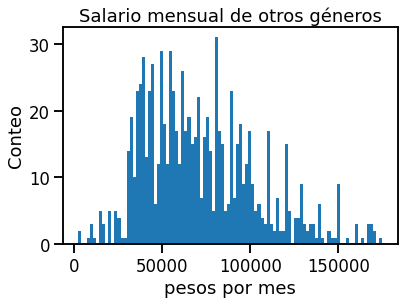

In [ ]:
plt.hist(groupB, bins=100)
plt.title('Salario mensual de otros géneros')
plt.xlabel('pesos por mes')
plt.ylabel('Conteo')
plt.show()

In [ ]:
# Efectuamos un test para saber si el salario de ambos grupos tiene distribución normal#
import numpy as np
import scipy.stats as stats
stats.jarque_bera(groupA)

(4544.967935778222, 0.0)

In [ ]:
# Ninguno de los grupos tiene distribución normal (pvalor < a 0.05 en el Test de Jarque Berra), incluso si se efectúa una transformación logarítmica, de aquí en adelante supondremos que 
# se distribuyen normal por lo que  tomaremos con precaución los resultados#
stats.jarque_bera(groupB)


(75.61240769748511, 0.0)

In [ ]:
# Creamos los estadísticos media muestralde ambos grupos#
mediaA=groupA.mean()
mediaB=groupB.mean()

In [ ]:
mediaA

87615.28006217843

In [ ]:
mediaB

71399.67313657407

In [ ]:
# Desviaciones estándar#
dsA= groupA.std()
dsA



48123.842363727905

In [ ]:
dsB= groupB.std()
dsB

32115.87898598429

In [ ]:
# Se observan distintas varianzas y tamaños de muestra entre los dos grupos, por lo que habría que aplicar el test de Welch#
# Estimación puntual de la diferencia de medias#
dif_medias= mediaB - mediaA
dif_medias
# La estimación mensual sugiere que las mujeres y otros géneros,  ganan en promedio $16215 pesos menos que los hombres#



-16215.606925604356

In [ ]:
# Armamos el intervalo de confianza#
# Siguiendo a Daniel Lakens#
alpha = 0.05                                                       
nA, nB = len(groupA), len(groupB)    # tamaño del grupo A (hombres)   y   tamaño del grupo B ("no hombres")                            
sA, sB = np.var(groupA, ddof=1), np.var(groupB, ddof=1)  # varianzas de ambas medias                 
df = (sA/nA + sB/nB)**2 / ((sA/nA)**2/(nA-1) + (sB/nB)**2/(nB-1)) #Grados de libertad del estadístico#
t = stats.t.ppf(1 - alpha/2, df)     # estadístico t para una prueba bilateral                              
li = (np.mean(groupB) - np.mean(groupA)) - t * np.sqrt(sA/nA + sB/nB) # límite inferior del intervalo de confianza 
ls = (np.mean(groupB) - np.mean(groupB)) + t * np.sqrt(sA/nA + sB/nB) # límite superior del intervalo de confianza

print("Intervalo al {:0.2f} % : Li={:0.4f} Ls={:0.4f} ".format((1-alpha)*100,li,ls))

Intervalo al 95.00 % : Li=-18765.6523 Ls=2550.0454 


In [ ]:
# El valor poblacional de la diferencia de los salarios promedio, se encuentra entre -$18.765 y $2.550 pesos con un 95% de confianza#
# Ahora se pueden efectuar pruebas de hipótesis sobre el valor poblacional de la diferencia salarial, y por ejemplo, inferir que es muy poco probable que los hombres ganen en promedio
# mas de 25000 pesos mensuales que las mujeres y otros géneros o, por ejemplo,  es muy probable que la diferencia poblacional de salario entre hombres y el resto, sea del al menos 5000 pesos, etc#

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=µ_a = µ_b;  H_1 µ_a ≠ µ_b$

**Estadístico (Pivote)**

  * Identificar el estadístico
  El estadístico t está definido de la siguiente forma:

  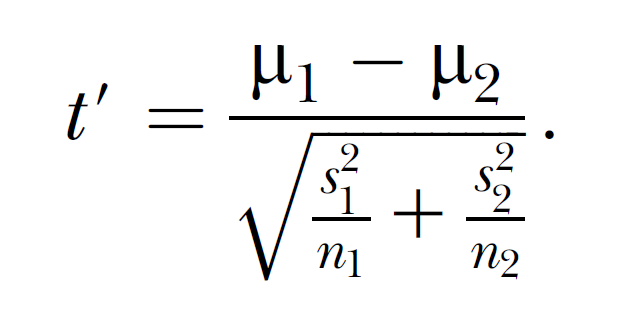

  Con grados de libertad:
  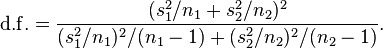

    * Escribir qué distribución tiene bajo $H_0$

A1, A2 ,...,An1 una m.a. de una v.a. X~N(𝝻1,𝞂2)

B1, B2 ,...,Bj2 una m.a. de una v.a. Y~N(𝝻2,𝞂2), 

Donde la diferencia de medias se distribuye t student con los siguientes grados de libertad (los expuestos en la fórmula de la sección anterior):

GL= (sA/nA + sB/nB)**2 / ((sA/nA)**2/(nA-1) + (sB/nB)**2/(nB-1)) 


**Nivel de significancia de la prueba**

Se define el nivel de significancia de la prueba,en este caso seleccionaremos α= 0.05, es decir que definimos el nivel de confianza de un 95% en la prueba de hipótesis, lo cual significa que en 95 de 100 muestreos el intervalo contendrá el valor poblacional.

**Se selecciona el estadístico de contraste**

El estadístico t ya citado en el supuesto de que se cumple H_0

**Regla de aceptación/rechazo**

Si el estadístico de prueba es mayor que cierto umbral "crítico", en este caso 1.96, se rechaza la hipótesis nula de que ambas medias son iguales, en favor de que las medias de salarios son distintas entre ambos grupos.




### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [ ]:
# 2.2.1 Cálculo del p valor de la prueba#
from scipy import stats
stats.ttest_ind(groupB,groupA, equal_var=False)
# 2.2.2 El estadístico t arroja un valor de 12.47 en valor absoluto, muy lejos de los valores críticos de 1.96 definidos para pruebas con 95% de confianza#
# por lo que se rechaza la hipótesis nula de igualdad de medias con un 95% de confianza#
# El p valor tiende a cero#





Ttest_indResult(statistic=-12.472314019770959, pvalue=3.3095673373638566e-34)

In [ ]:
# Comprobamos el resultado "a mano"
estad_de_prueba= dif_medias/ np.sqrt(sA/nA + sB/nB)
estad_de_prueba
# Lo cual sugiere lo mismo, un p valor que tiende a cero y por ende se rechaza la hipótesis de igualdad de salarios entre grupos con un 
# 95% de confianza

-12.472314019770998

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

298.3073379956589

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.
